BZAN 542

Charles Liu

In [1]:
library(MASS)

# Example: European Protein Consumption

European Protein Consumption in grams/person-day

In [2]:
food <- read.csv("protein.csv")
head(food)

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
2,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
3,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
4,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
5,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
6,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4


In [3]:
rownames(food)=food$Country
food$Country=NULL
head(food)

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4


## Clustering with just meat

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Albania,1,2,3,1,4,1,5,2,3,2
Austria,1,1,1,2,1,6,6,6,7,6
Belgium,1,1,2,4,2,4,7,4,9,4
Bulgaria,1,2,3,3,3,3,1,1,6,1
Czechoslovakia,1,1,1,2,1,6,6,6,7,3
Denmark,1,1,1,2,2,6,6,6,7,3


[1] 596.38000 294.50662 144.98383 113.01979  84.83333  65.44667

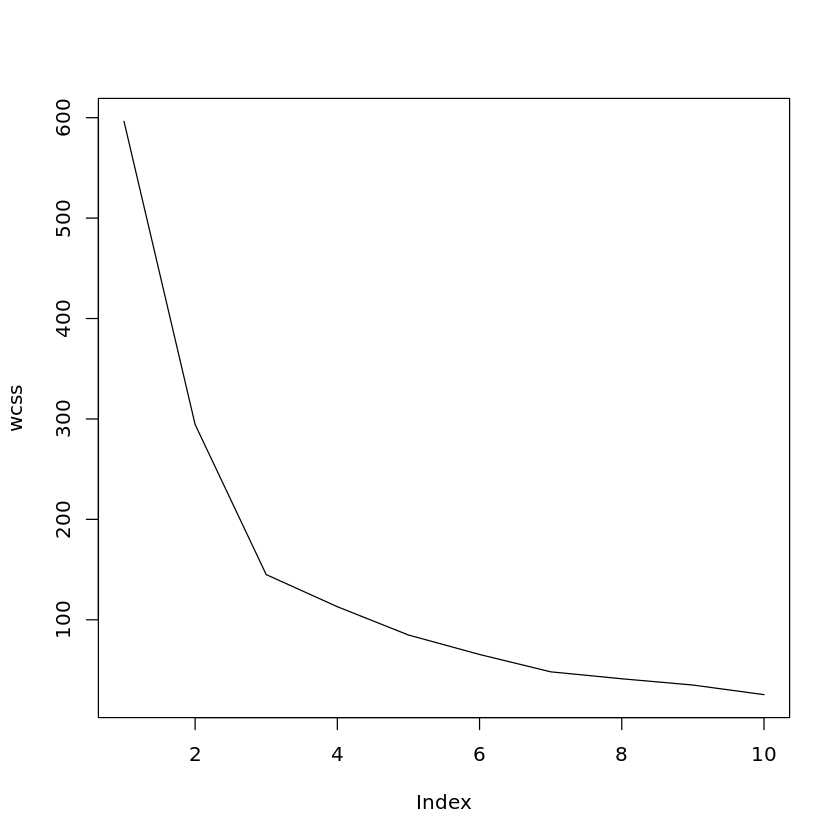

In [4]:
set.seed(542)
clusters=data.frame(row.names = rownames(food))
wcss=numeric(10)
for(k in 1:10){
    fit = kmeans(food[,c("WhiteMeat","RedMeat")], centers=k, nstart=10)
    clusters[,k]=fit$cluster
    wcss[k]=fit$tot.withinss
}
head(clusters)
head(wcss)
plot(wcss, type='l')

In [5]:
table(clusters[,c(2,3)])

   V3
V2   1  2  3
  1  8  5  1
  2  0  0 11

In [6]:
set.seed(1) ## to fix the random starting clusters
grpMeat <- kmeans(food[,c("WhiteMeat","RedMeat")], centers=3, nstart=10)
grpMeat

K-means clustering with 3 clusters of sizes 5, 8, 12

Cluster means:
  WhiteMeat   RedMeat
1  9.000000 15.180000
2 12.062500  8.837500
3  4.658333  8.258333

Clustering vector:
       Albania        Austria        Belgium       Bulgaria Czechoslovakia 
             3              2              1              3              2 
       Denmark      E Germany        Finland         France         Greece 
             2              2              3              1              3 
       Hungary        Ireland          Italy    Netherlands         Norway 
             2              1              3              2              3 
        Poland       Portugal        Romania          Spain         Sweden 
             2              3              3              3              3 
   Switzerland             UK           USSR      W Germany     Yugoslavia 
             1              1              3              2              3 

Within cluster sum of squares by cluster:
[1] 35.66800 39.4575

In [7]:
grpMeat$tot.withinss

[1] 144.9838

In [8]:
grpMeat$cluster

Albania        Austria        Belgium       Bulgaria Czechoslovakia 
             3              2              1              3              2 
       Denmark      E Germany        Finland         France         Greece 
             2              2              3              1              3 
       Hungary        Ireland          Italy    Netherlands         Norway 
             2              1              3              2              3 
        Poland       Portugal        Romania          Spain         Sweden 
             2              3              3              3              3 
   Switzerland             UK           USSR      W Germany     Yugoslavia 
             1              1              3              2              3

In [9]:
sort(grpMeat$cluster)

Belgium         France        Ireland    Switzerland             UK 
             1              1              1              1              1 
       Austria Czechoslovakia        Denmark      E Germany        Hungary 
             2              2              2              2              2 
   Netherlands         Poland      W Germany        Albania       Bulgaria 
             2              2              2              3              3 
       Finland         Greece          Italy         Norway       Portugal 
             3              3              3              3              3 
       Romania          Spain         Sweden           USSR     Yugoslavia 
             3              3              3              3              3

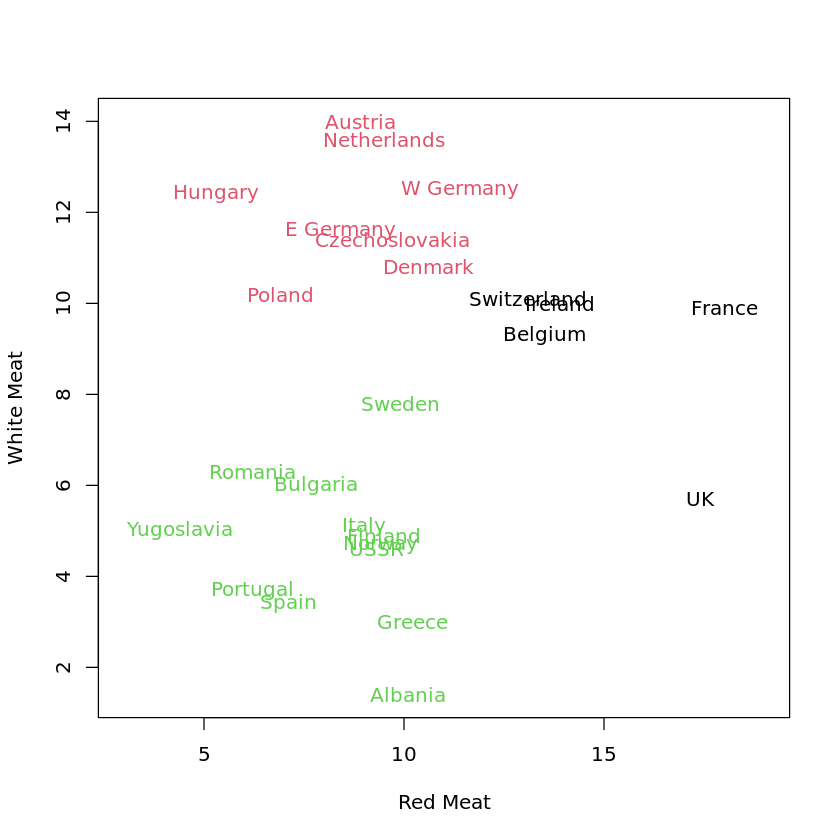

In [10]:
plot(food$Red, food$White, type="n", xlim=c(3,19), xlab="Red Meat", ylab="White Meat")
text(x=food$Red, y=food$White, labels=rownames(food), col=grpMeat$cluster)

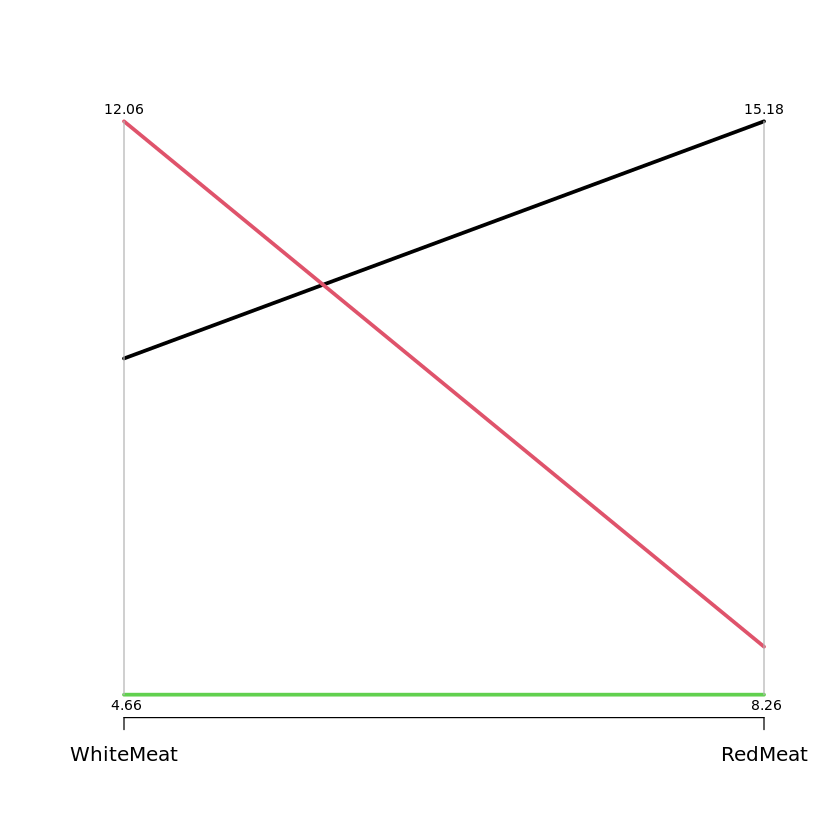

In [11]:
parcoord(grpMeat$centers, col = 1:3, lwd = 3, var.label = T)

## Clustering with 7 protein groups

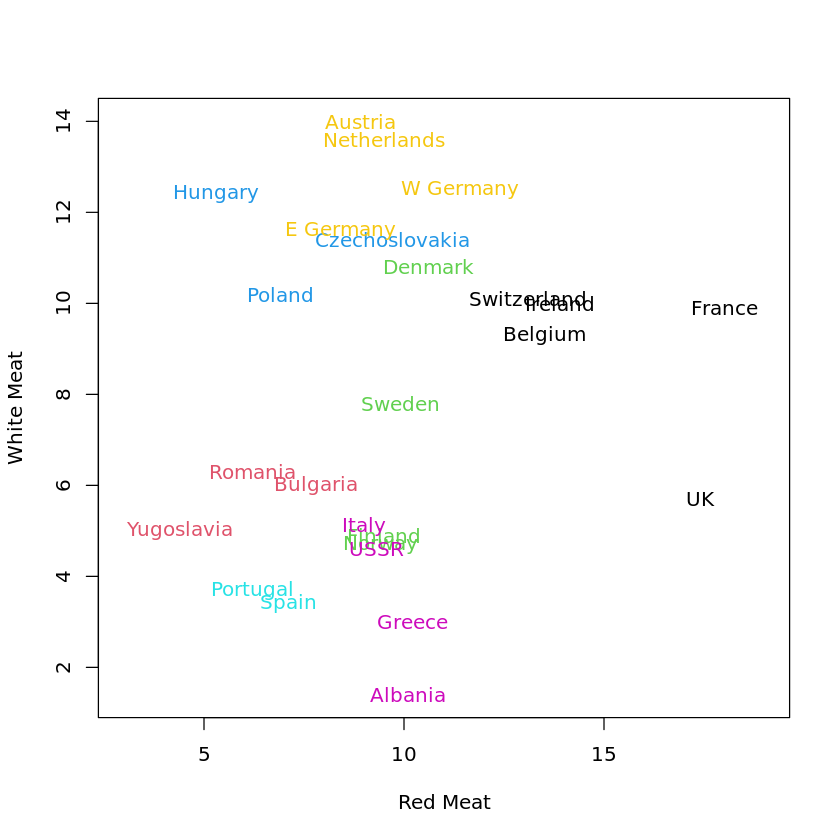

In [12]:
set.seed(1)
grpProtein <- kmeans(food, centers=7, nstart=10)
plot(food$Red, food$White, type="n", xlim=c(3,19), xlab="Red Meat", ylab="White Meat")
text(x=food$Red, y=food$White, labels=rownames(food), col=grpProtein$cluster)

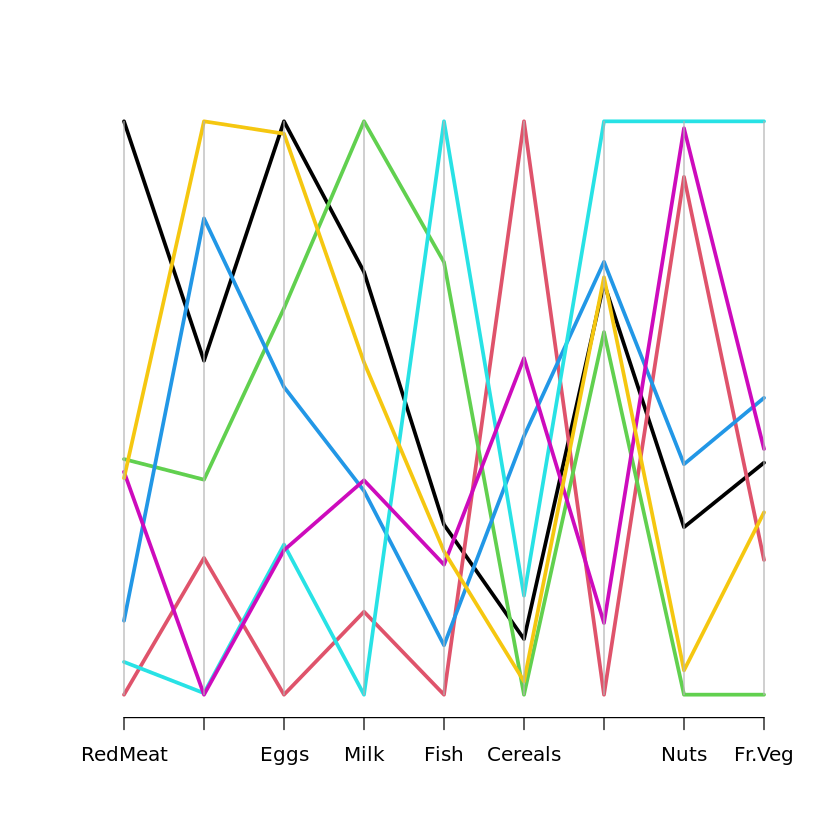

In [13]:
parcoord(grpProtein$centers, col = 1:7, lwd = 3)

## hclust

In [14]:
fit=hclust(dist(food[,c("WhiteMeat", "RedMeat")], method="euclidean"), method="average")
cutree(fit, 3)

Albania        Austria        Belgium       Bulgaria Czechoslovakia 
             1              2              3              1              2 
       Denmark      E Germany        Finland         France         Greece 
             2              2              1              3              1 
       Hungary        Ireland          Italy    Netherlands         Norway 
             2              3              1              2              1 
        Poland       Portugal        Romania          Spain         Sweden 
             2              1              1              1              1 
   Switzerland             UK           USSR      W Germany     Yugoslavia 
             3              3              1              2              1

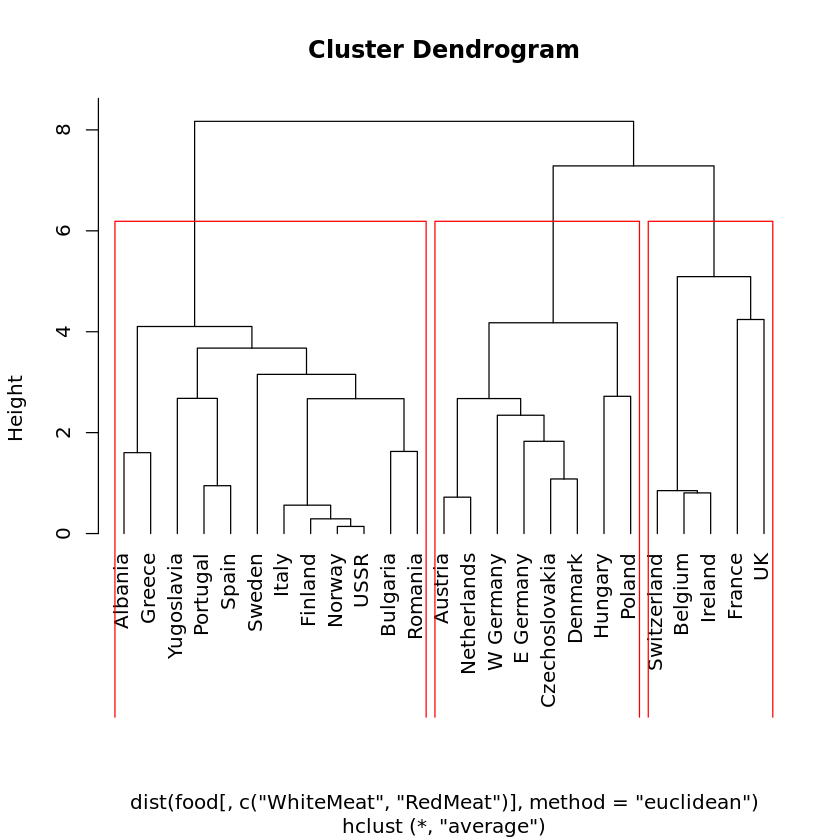

In [15]:
plot(fit, hang=-1)
rect.hclust(fit, k=3, border="red")

## hclust with all nine variables (features) and different linkage method

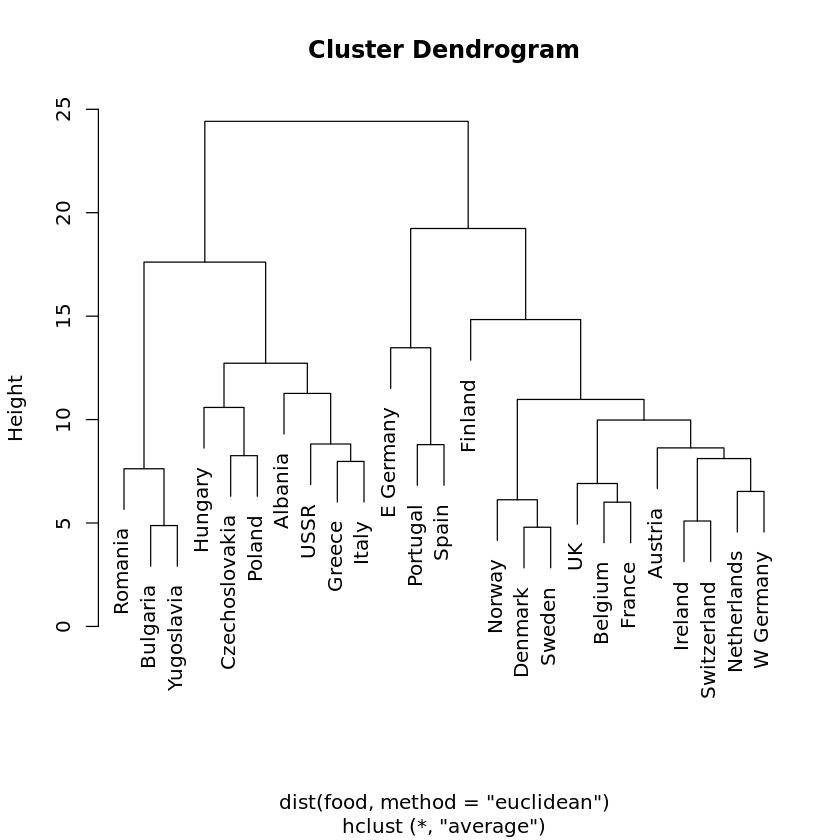

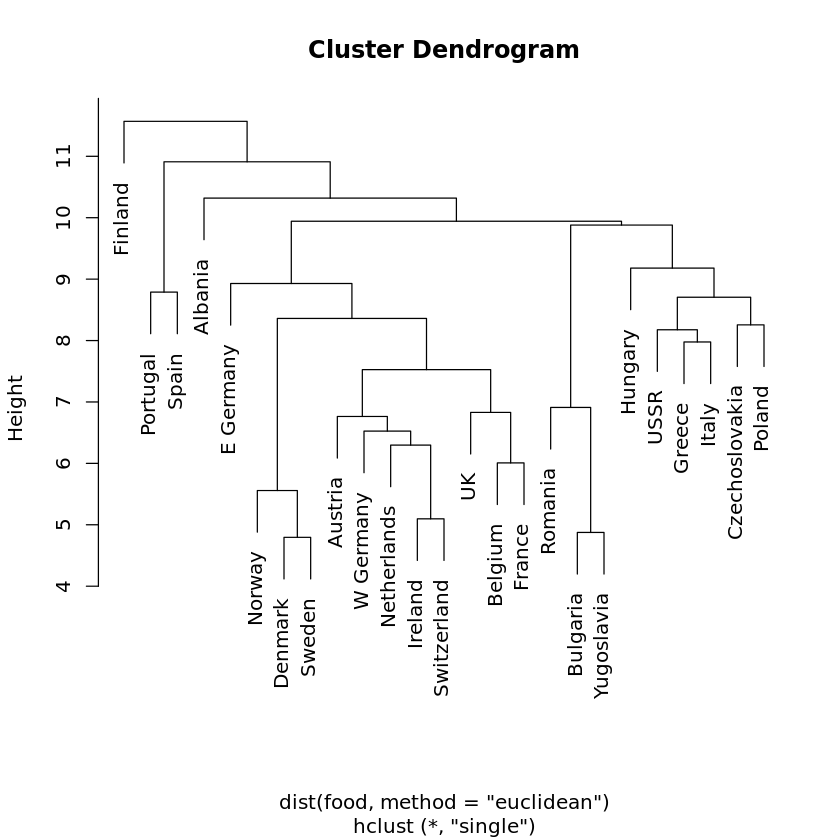

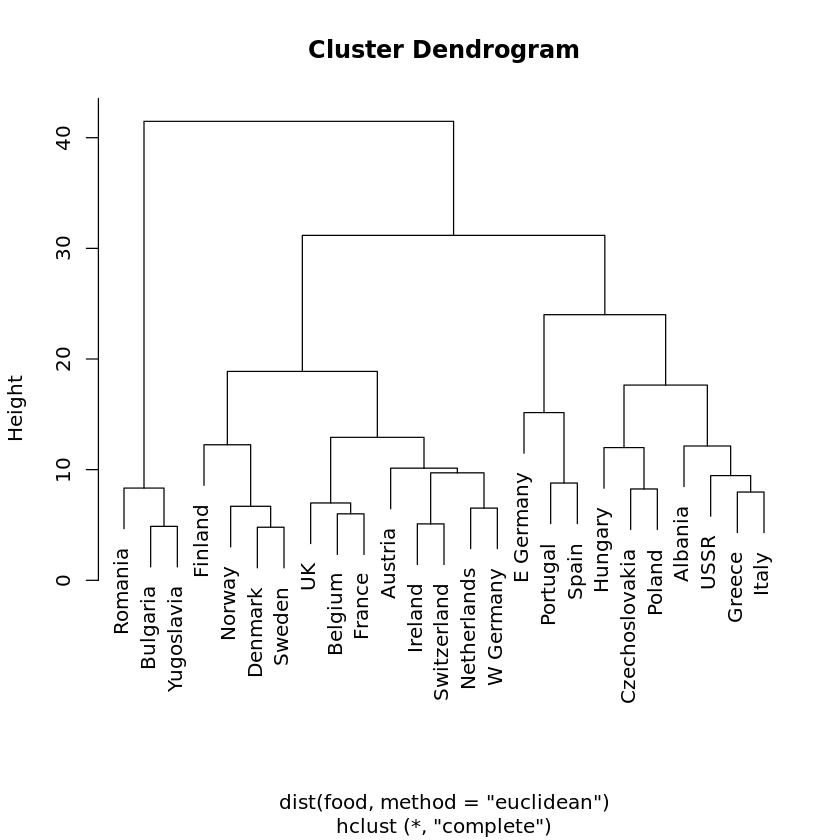

In [16]:
foodagg=hclust(dist(food, method="euclidean"), method="average")
plot(foodagg)

foodaggsin=hclust(dist(food, method="euclidean"), method="single")
plot(foodaggsin)

foodaggcomp=hclust(dist(food, method="euclidean"), method="complete")
plot(foodaggcomp)

# Example: Monthly US Unemployment Rates 

In [17]:
raw <- read.csv("unempstates.csv")
dim(raw)
head(raw)

[1] 416  50

,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,⋯,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6.4,7.1,10.5,7.3,9.3,5.8,9.4,7.7,10.0,8.3,⋯,3.6,5.9,5.9,6.1,8.8,6.2,8.7,8.3,5.9,4.2
2,6.3,7.0,10.3,7.2,9.1,5.7,9.3,7.8,9.8,8.2,⋯,3.5,5.9,5.9,5.9,8.7,6.1,8.7,8.1,5.7,4.1
3,6.1,7.0,10.0,7.1,9.0,5.6,9.2,7.9,9.5,8.1,⋯,3.4,5.9,5.8,5.7,8.6,5.9,8.7,7.9,5.6,4.0
4,6.0,7.0,9.8,7.0,8.9,5.5,9.1,8.1,9.3,8.0,⋯,3.3,6.0,5.8,5.6,8.6,5.8,8.7,7.6,5.5,3.9
5,6.0,7.0,9.6,6.9,8.9,5.5,9.0,8.3,9.1,7.9,⋯,3.2,6.0,5.8,5.5,8.5,5.7,8.7,7.4,5.4,3.9
6,6.0,7.1,9.5,6.8,8.9,5.6,9.0,8.5,9.0,7.9,⋯,3.2,6.1,5.8,5.4,8.5,5.6,8.8,7.3,5.4,3.9


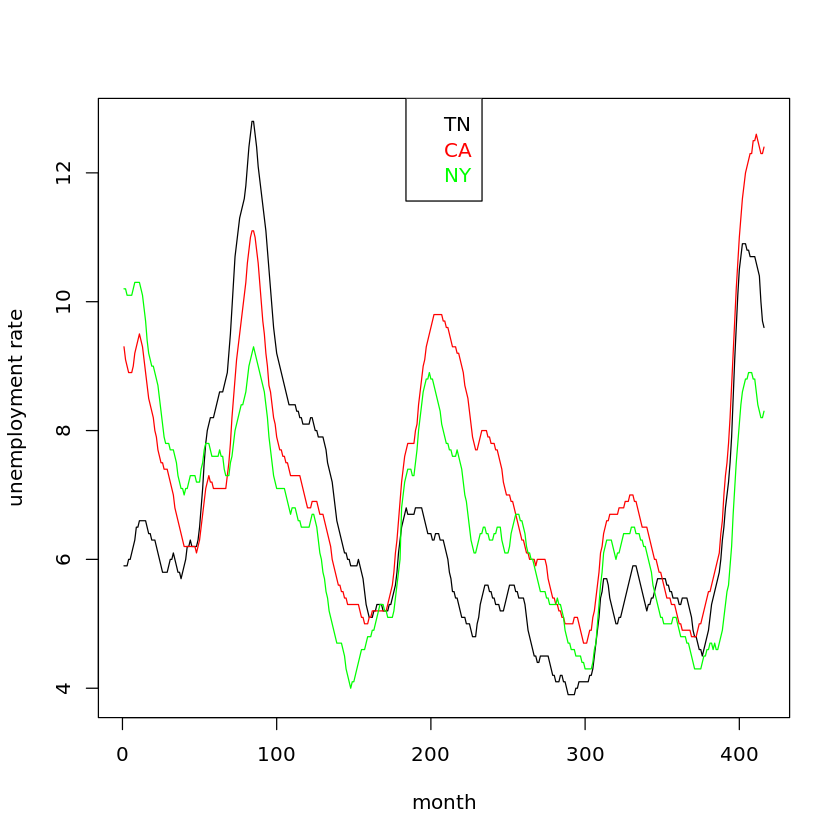

In [18]:
## time sequence plots of three series
plot(raw$TN, type="l", xlab="month", ylab="unemployment rate", col='black')
points(raw$CA, type="l", col="red")
points(raw$NY, type="l", col="green")
legend("top", c('TN', 'CA', 'NY'), text.col=c('black', 'red', 'green'))

## Agglomerative clustering on the correlation between the series

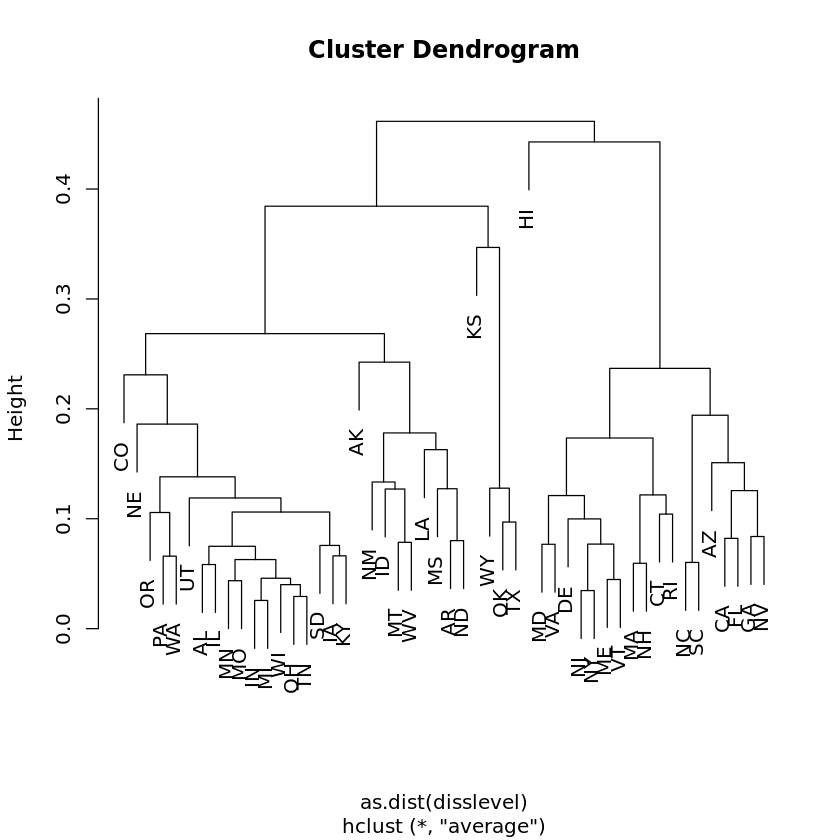

In [19]:
corlevel=cor(data.frame(raw))
disslevel=1-corlevel
outcorlevel=hclust(as.dist(disslevel), method="average")
plot(outcorlevel)

## How about kmeans?

In [20]:
rawt=t(raw)
head(rawt)

AL,6.4,6.3,6.1,6.0,6.0,6.0,6.2,6.3,6.4,6.5,⋯,10.9,10.9,11.1,11.1,11.0,11.0,10.7,10.3,9.7,9.2
AK,7.1,7.0,7.0,7.0,7.0,7.1,7.4,7.7,8.0,8.3,⋯,8.5,8.6,8.5,8.5,8.5,8.4,8.2,7.9,7.7,7.7
AZ,10.5,10.3,10.0,9.8,9.6,9.5,9.5,9.5,9.6,9.6,⋯,9.3,9.2,9.2,9.5,9.6,9.5,9.6,9.6,9.6,9.7
AR,7.3,7.2,7.1,7.0,6.9,6.8,6.7,6.7,6.6,6.6,⋯,7.6,7.6,7.6,7.7,7.8,7.8,7.7,7.5,7.4,7.5
CA,9.3,9.1,9.0,8.9,8.9,8.9,9.0,9.2,9.3,9.4,⋯,12.3,12.3,12.5,12.5,12.6,12.5,12.4,12.3,12.3,12.4
CO,5.8,5.7,5.6,5.5,5.5,5.6,5.8,6.1,6.3,6.5,⋯,7.4,7.3,7.4,7.7,7.9,8.0,8.0,8.0,8.0,8.2


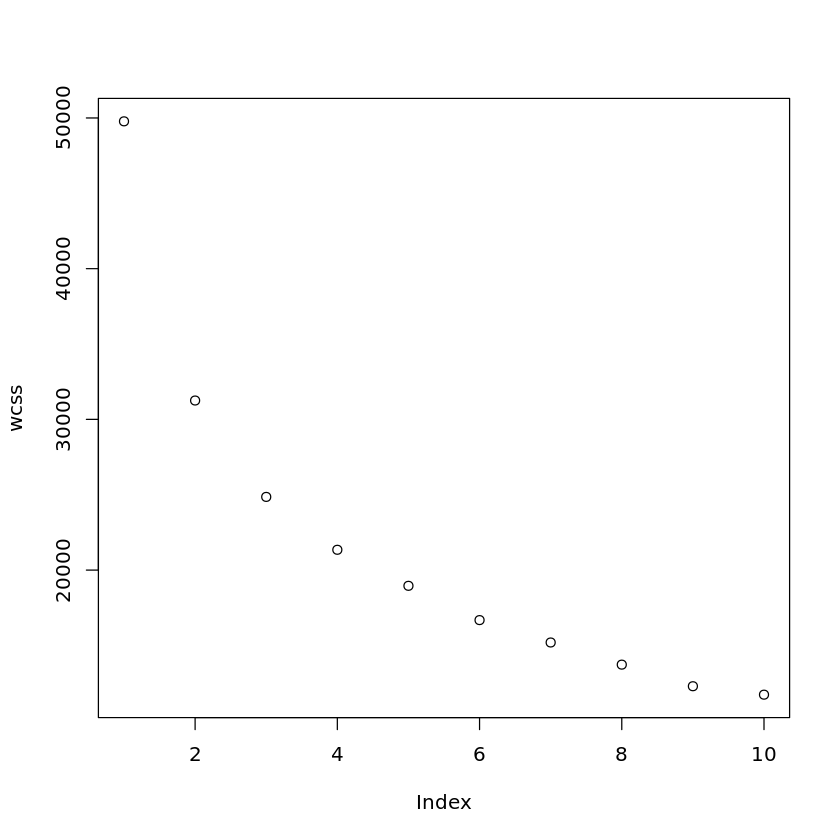

In [21]:
wcss=numeric(10)
for(k in 1:10){
    fit = kmeans(rawt, centers=k, nstart=10)
    wcss[k]=fit$tot.withinss
}
plot(wcss)

# Example: Hierarchical Clustering

In [22]:
D=matrix(0, nrow=5, ncol=5)
D[2,1]=9 
D[3,1]=3
D[4,1]=6
D[5,1]=11
D[3,2]=7
D[4,2]=5
D[5,2]=10
D[4,3]=9
D[5,3]=2
D[5,4]=8
D=D+t(D)
D

0,9,3,6,11
9,0,7,5,10
3,7,0,9,2
6,5,9,0,8
11,10,2,8,0


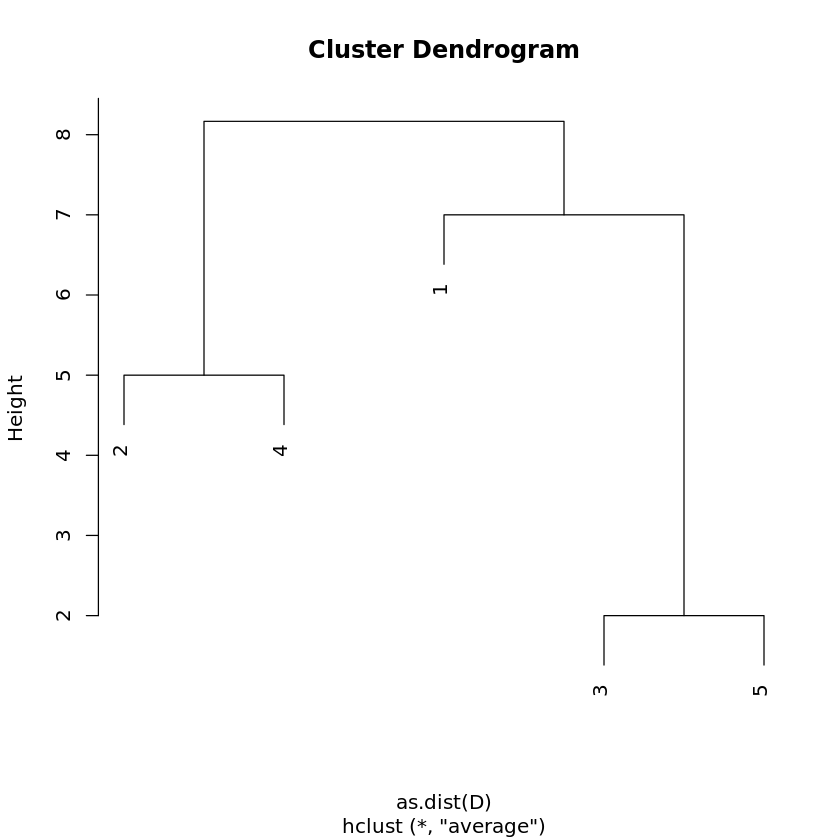

In [23]:
plot(hclust(as.dist(D), method='average'))

0,9,3,6,11
9,0,7,5,10
3,7,0,9,9
6,5,9,0,8
11,10,9,8,0


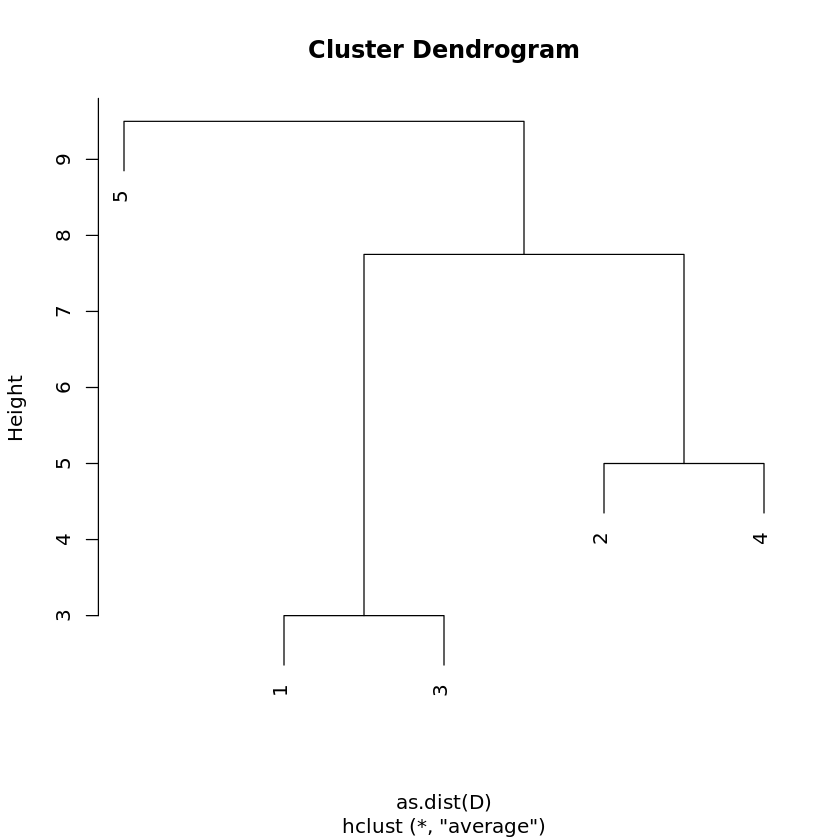

In [24]:
D[5,3]=D[3,5]=9
D
plot(hclust(as.dist(D), method="average"))